In [1]:
import numpy as np

In [2]:
!pip install rdkit-pypi
!pip install openai
!pip install pubchempy
import pubchempy as pcp

!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=4ed68daab0162e6a912a207cea34e2bed2a6d55cf863d9c5247e7dd6c3121c7c
  Stored in directory: 

In [3]:
sdf_file = '/content/CBLB_inhibitors_vsF.sdf'
suppl = Chem.SDMolSupplier(sdf_file)


# 分子をSMILES形式に変換する
molecules = []
for mol in suppl:
    if mol is not None:
        smiles = Chem.MolToSmiles(mol)
        molecules.append(smiles)
activity_scores=[]


In [4]:
import random
index=[0]*10
for i in range(10):
  index[i]=random.randint(0,len(molecules)-1)
index=sorted(index)

In [64]:
index=[33,116,129,164,209,578,676,725,821,854]

In [65]:
smiles=[]
properties = ['IUPACName', 'CanonicalSMILES']
for i in range(10):
  smiles.append(pcp.get_properties(properties,molecules[index[i]],'smiles'))
l=[]
for i in range(10):
  l.append([smiles[i][0]['CanonicalSMILES'],smiles[i][0]['IUPACName']])
for i in range(10):
  print(l[i][0])

CC(C1=CC(=CC=C1)N2C=C(N=N2)C3=CC=C(C=C3)C(=O)NC)SC4=NN=CN4C
CN1C=NN=C1CC(C2=CC(=CC=C2)N3CC4=C(C3=O)C=CC=C4C(F)(F)F)C(F)(F)F
CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)C(=O)O
CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)N(C)C5CCNC5
CC(C1=CC(=CC=C1)N2CC3=C(C2=O)C=C(C=C3C(F)(F)F)C(=O)N4CC(C4)C(F)F)(C(C5=NN=CN5C)(F)F)F
CC(CC1=NN=CN1C)C2=CC(=CC=C2)NC(=O)C3=CC(=CC(=N3)C4CC4)C(=O)N5CCC(C5)O
CC1CCC2=C1NN=C2C(=O)NC3=CC=CC(=C3)C(C)CC4=NN=CN4C
CC(C1=CC(=CC=C1)NC(=O)N2CCS(=O)(=O)CC2)SC3=NN=CN3C
CC1CC(CN1C(=O)C2=CC(=NC=C2)C(=O)NC3=CC=CC(=C3)C(C)SC4=NN=CN4C)O
CC(C1=CC(=CC=C1)NC(=O)C2=NC3=CC=CC=C3C=C2)SC4=NN=CN4C


In [8]:
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

In [87]:
#1,5は構文エラー、2,3,6,7,9は同一のもの 0,4,8はok
slist=['CC1=CC=C(C=C1)NC2=NC=C(N2)C3=CC=C(C=C3)C(=O)NC',#ok
'CC(C1=CC=CC=C1)C2=CC(=CC=C2)N3CCC4=C(C3=O)C=CC=C4C(F)(F)(F)C(F)F',
'CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)C(=O)O',
'CC(CC1=NN=CN1C)C2=CC(=CC=C2)N3CC4=C(C3=O)C=C(C=C4C(F)(F)F)N(C)C5CCNC5',
'CC(C1=CC(=CC=C1)N2C=C(N=N2)C3=CC(C=C3)C(=O)NC)SC4=NN=CN4C',#ok
'CN1C=NN=C1CC(C2=CC(=CC=C2)N3CC4=C(C3=O)C=CC=C4C(F)(F)(F)C(F)F)',
'CC(C1=CC(=CC=C1)NC(=O)N2CCS(=O)(=O)CC2)SC3=NN=CN3C',
'CC1CC(CN1C(=O)C2=CC(=NC=C2)C(=O)NC3=CC=CC(=C3)C(C)SC4=NN=CN4C)O',
'CC1CCC2=C1NN=C2C(=O)NC3=CC=CC(=C3)C(C)CC4=NN=CN4C',#ok
'CC(C1=CC(=CC=C1)NC(=O)C2=NC3=CC=CC=C3C=C2)SC4=NN=CN4C',
]

[03:47:59] Explicit valence for atom # 25 C, 5, is greater than permitted


In [10]:
#全部okかつ全て異なるもの
slist=['CC(=O)NCC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=CC(=C3)N',
'CC(=O)N1CCN(CC1)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=CC(=C3)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=CC(=C3)N(C)C']

In [11]:
slist=['CC1=CC=C(C=C1)NC2=NC=C(N2)C3=CC=C(C=C3)C(=O)NC',
'CC(C1=CC(=CC=C1)N2C=C(N=N2)C3=CC(C=C3)C(=O)NC)SC4=NN=CN4C',
'CC1CCC2=C1NN=C2C(=O)NC3=CC=CC(=C3)C(C)CC4=NN=CN4C',
'CC(=O)NCC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N(C)C',
'CC(=O)NCC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N(C)C',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC(=O)N1CCN(CC1)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C3)NC(=O)C4=CC=CC(=C4)N',
'CC1=CC=C(C=C1)NC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=CC(=C3)N(C)C']

In [12]:
max=[]
for i in range(len(slist)):
  if i!=5:
    mol=Chem.MolFromSmiles(slist[i])
    m=[0,0,i]
    for j in range(len(molecules)):
      mol1=Chem.MolFromSmiles(molecules[j])
      fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
      fp2 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
      similarity = TanimotoSimilarity(fp1, fp2)
      if m[0]< similarity:
        m[0]=similarity
        m[1]=j
    max.append(m)

max


[[0.2631578947368421, 17, 0],
 [0.6666666666666666, 32, 1],
 [0.803030303030303, 676, 2],
 [0.2714285714285714, 844, 3],
 [0.3787878787878788, 842, 4],
 [0.2786885245901639, 842, 6],
 [0.423728813559322, 842, 7],
 [0.38235294117647056, 842, 8],
 [0.4426229508196721, 844, 9]]

In [13]:
for i in range(len(slist)):
  for j in range(i+1,len(slist)):
    mol1=Chem.MolFromSmiles(slist[i])
    mol2=Chem.MolFromSmiles(slist[j])
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)
    similarity = TanimotoSimilarity(fp1, fp2)
    if similarity>0.9:
      print(i,j,similarity)


In [15]:
max=0
a=[]

for i in range(len(molecules)-1):
  for j in range(i+1,len(molecules)-1):
    mol1 = Chem.MolFromSmiles(molecules[i])
    mol2 = Chem.MolFromSmiles(molecules[j])
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)
    similarity = TanimotoSimilarity(fp1, fp2)
    if similarity>=0.80:
      a.append([i,j,similarity])
print(a)


[[0, 1, 1.0], [2, 3, 1.0], [5, 6, 1.0], [5, 8, 0.8181818181818182], [5, 9, 0.8333333333333334], [5, 12, 0.8035714285714286], [5, 18, 0.8070175438596491], [5, 19, 0.8070175438596491], [6, 8, 0.8181818181818182], [6, 9, 0.8333333333333334], [6, 12, 0.8035714285714286], [6, 18, 0.8070175438596491], [6, 19, 0.8070175438596491], [8, 9, 0.8392857142857143], [10, 11, 0.847457627118644], [12, 13, 0.8448275862068966], [14, 15, 0.864406779661017], [14, 16, 0.8360655737704918], [14, 18, 0.864406779661017], [15, 17, 0.8360655737704918], [15, 19, 0.864406779661017], [16, 17, 0.8688524590163934], [16, 18, 0.8360655737704918], [17, 19, 0.8360655737704918], [18, 19, 0.864406779661017], [21, 24, 0.8035714285714286], [21, 26, 0.8181818181818182], [21, 27, 0.8333333333333334], [21, 34, 0.8070175438596491], [21, 35, 0.8070175438596491], [22, 23, 0.8620689655172413], [24, 25, 0.8448275862068966], [26, 27, 0.8392857142857143], [28, 29, 0.847457627118644], [30, 31, 0.864406779661017], [30, 32, 0.836065573770

In [29]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[8]), 2, nBits=1024)
fp2 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[12]), 2, nBits=1024)
print(TanimotoSimilarity(fp1, fp2))

0.7213114754098361


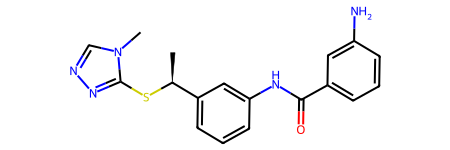

In [91]:
Chem.MolFromSmiles(molecules[842])

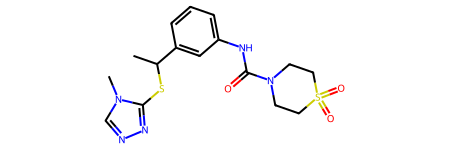

In [92]:
Chem.MolFromSmiles(slist[6])

In [35]:
index=random.randint(0,len(molecules)-1)
index

461

In [93]:
index=[461]
for i in range(19):
  min=[0,1]
  for j in range(len(molecules)):
    tmp=0
    fp1=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[j]), 2, nBits=1024)
    for k in range(len(index)):
      fp2=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[k]]), 2, nBits=1024)
      sim=TanimotoSimilarity(fp1, fp2)
      if sim>tmp:
        tmp=sim
    if min[1]>tmp:
      min=[j,tmp]
  index.append(min[0]) 
      


In [95]:
index=sorted(index)
index

[20,
 58,
 79,
 97,
 408,
 439,
 461,
 471,
 485,
 517,
 616,
 624,
 630,
 659,
 669,
 684,
 737,
 797,
 873,
 892]

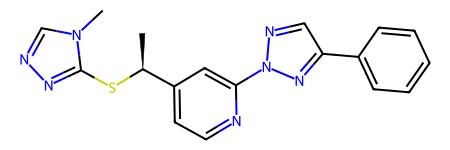

In [96]:
index=[20,
 58,
 79,
 97,
 408,
 439,
 461,
 471,
 485,
 517,
 616,
 624,
 630,
 659,
 669,
 684,
 737,
 797,
 873,
 892]
m=Chem.MolFromSmiles(molecules[20])
m
# a=molecules[20]
# aa = pcp.get_compounds(a, 'smiles')
# aa

In [62]:
for i in range(len(index)):
  fp1=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[i]]), 2, nBits=1024)
  for j in range(i+1,len(index)):
    fp2=AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(molecules[index[j]]), 2, nBits=1024)
    # print(i,j,TanimotoSimilarity(fp1, fp2))


In [97]:
smiles=[]
for i in range(len(index)):
  smiles.append(molecules[i])
smiles

['C[C@H](Sc1nncn1C)c1cccc(-c2n[nH]c3ccccc23)c1',
 'C[C@@H](Sc1nncn1C)c1cccc(-c2n[nH]c3ccccc23)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-c2cc(-c3ccccc3)n[nH]2)c1',
 'C[C@@H](Sc1nncn1C)c1cccc(-c2cc(-c3ccccc3)n[nH]2)c1',
 'COc1cccc(-c2cc(-c3cccc([C@H](C)Sc4nncn4C)c3)[nH]n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccccc3)n2)c1',
 'C[C@@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccccc3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccc(CO)cc3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3cccc(Cl)c3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccc(Cl)cc3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccc(C#N)cc3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3cccc(C#N)c3)n2)c1',
 'COc1ccc(-c2cnn(-c3cccc([C@H](C)Sc4nncn4C)c3)n2)cc1',
 'COc1cccc(-c2cnn(-c3cccc([C@H](C)Sc4nncn4C)c3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3cccc(C(N)=O)c3)n2)c1',
 'C[C@H](Sc1nncn1C)c1cccc(-n2ncc(-c3ccc(C(N)=O)cc3)n2)c1',
 'CNC(=O)c1cccc(-c2cnn(-c3cccc([C@H](C)Sc4nncn4C)c3)n2)c1',
 'CNC(=O)c1ccc(-c2cnn(-c3cccc([C@H](C)Sc4nncn4C)c3)n2)cc1',
 'C[C@